In [1]:
from PIL import Image,ImageFilter

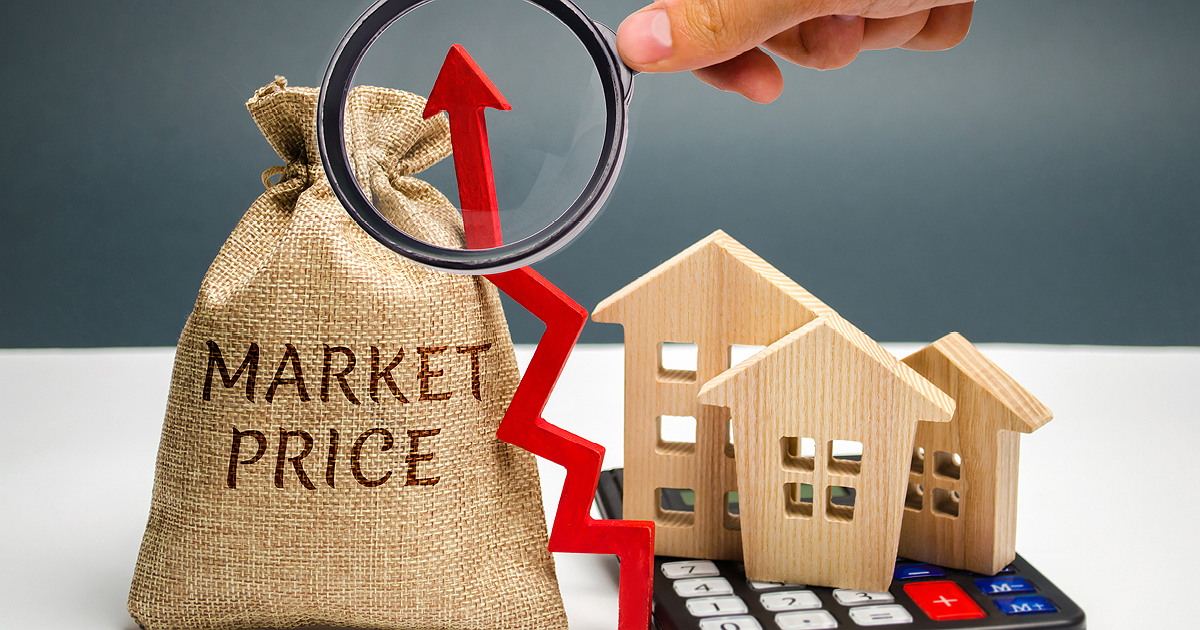

In [2]:
i = Image.open('open image 2.jpg')
DETAIL = i.filter(ImageFilter.DETAIL)
DETAIL

SalePrice - the property's sale price in dollars. This is the target variable, consider as the problem which should be solved. <br>
MSSubClass: The building class <br>
MSZoning: The general zoning classification <br>
LotFrontage: Linear feet of street connected to property <br>
LotArea: Lot size in square feet <br>
Street: Type of road access <br>
Alley: Type of alley access <br>
LotShape: General shape of property <br>
LandContour: Flatness of the property <br>
Utilities: Type of utilities available <br>
LotConfig: Lot configuration <br>
LandSlope: Slope of property <br>
Neighborhood: Physical locations within Ames city limits <br>
Condition1: Proximity to main road or railroad <br>
Condition2: Proximity to main road or railroad (if a second is present) <br>
BldgType: Type of dwelling <br>
HouseStyle: Style of dwelling <br>
OverallQual: Overall material and finish quality <br>
OverallCond: Overall condition rating <br>
YearBuilt: Original construction date <br>
YearRemodAdd: Remodel date <br>
RoofStyle: Type of roof <br>
RoofMatl: Roof material <br>
Exterior1st: Exterior covering on house <br>
Exterior2nd: Exterior covering on house (if more than one material) <br>
MasVnrType: Masonry veneer type <br>
MasVnrArea: Masonry veneer area in square feet <br>
ExterQual: Exterior material quality <br>
ExterCond: Present condition of the material on the exterior <br>
Foundation: Type of foundation <br>
BsmtQual: Height of the basement <br>
BsmtCond: General condition of the basement <br>
BsmtExposure: Walkout or garden level basement walls <br>
BsmtFinType1: Quality of basement finished area <br>
BsmtFinSF1: Type 1 finished square feet <br>
BsmtFinType2: Quality of second finished area (if present) <br>
BsmtFinSF2: Type 2 finished square feet <br>
BsmtUnfSF: Unfinished square feet of basement area <br>
TotalBsmtSF: Total square feet of basement area <br>
Heating: Type of heating <br>
HeatingQC: Heating quality and condition <br>
CentralAir: Central air conditioning <br>
Electrical: Electrical system <br>
1stFlrSF: First Floor square feet <br>
2ndFlrSF: Second floor square feet <br>
LowQualFinSF: Low quality finished square feet (all floors) <br>
GrLivArea: Above grade (ground) living area square feet <br>
BsmtFullBath: Basement full bathrooms <br>
BsmtHalfBath: Basement half bathrooms <br>
FullBath: Full bathrooms above grade <br>
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level <br>
Kitchen: Number of kitchens <br>
KitchenQual: Kitchen quality <br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) <br>
Functional: Home functionality rating <br>
Fireplaces: Number of fireplaces <br>
FireplaceQu: Fireplace quality <br>
GarageType: Garage location <br>
GarageYrBlt: Year garage was built <br>
GarageFinish: Interior finish of the garage <br>
GarageCars: Size of garage in car capacity <br>
GarageArea: Size of garage in square feet <br>
GarageQual: Garage quality <br>
GarageCond: Garage condition <br>
PavedDrive: Paved driveway <br>
WoodDeckSF: Wood deck area in square feet <br>
OpenPorchSF: Open porch area in square feet <br>
EnclosedPorch: Enclosed porch area in square feet <br>
3SsnPorch: Three season porch area in square feet <br>
ScreenPorch: Screen porch area in square feet <br>
PoolArea: Pool area in square feet <br>
PoolQC: Pool quality <br>
Fence: Fence quality <br>
MiscFeature: Miscellaneous feature not covered in other categories <br>
MiscVal: Value of miscellaneous feature <br>
MoSold: Month Sold <br>
YrSold: Year Sold <br>
SaleType: Type of sale <br>
SaleCondition: Condition of sale <br>

# Basic Imports, Load Datasets, and Data Heads

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from pandas.api.types import is_numeric_dtype, is_object_dtype

In [4]:
data_test_res = pd.read_csv('sample_submission.csv')

In [5]:
data_test_res.head(3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


In [6]:
data_test  = pd.read_csv('test.csv')

In [7]:
data_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [8]:
data_test = pd.merge(data_test, data_test_res, on="Id")
data_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570


In [9]:
data_train = pd.read_csv('train.csv')

In [10]:
data_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [11]:
# Drop Id columns.
# due to, has no contribution to analysis
# data_train.drop('Id', axis = 1, inplace = True)

# Explore and Order Data

## Basic Data Information:

In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.000000,1825.500000,2190.000000,2554.500000,2919.000000
MSSubClass,1459.0,57.378341,42.746880,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1232.0,68.580357,22.376841,21.000000,58.000000,67.000000,80.000000,200.000000
LotArea,1459.0,9819.161069,4955.517327,1470.000000,7391.000000,9399.000000,11517.500000,56600.000000
OverallQual,1459.0,6.078821,1.436812,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1459.0,5.553804,1.113740,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1459.0,1971.357779,30.390071,1879.000000,1953.000000,1973.000000,2001.000000,2010.000000
YearRemodAdd,1459.0,1983.662783,21.130467,1950.000000,1963.000000,1992.000000,2004.000000,2010.000000
MasVnrArea,1444.0,100.709141,177.625900,0.000000,0.000000,0.000000,164.000000,1290.000000
BsmtFinSF1,1458.0,439.203704,455.268042,0.000000,0.000000,350.500000,753.500000,4010.000000


In [15]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Both descriptions have no extraordinary numeric features such as negative areas or unusual gaps.

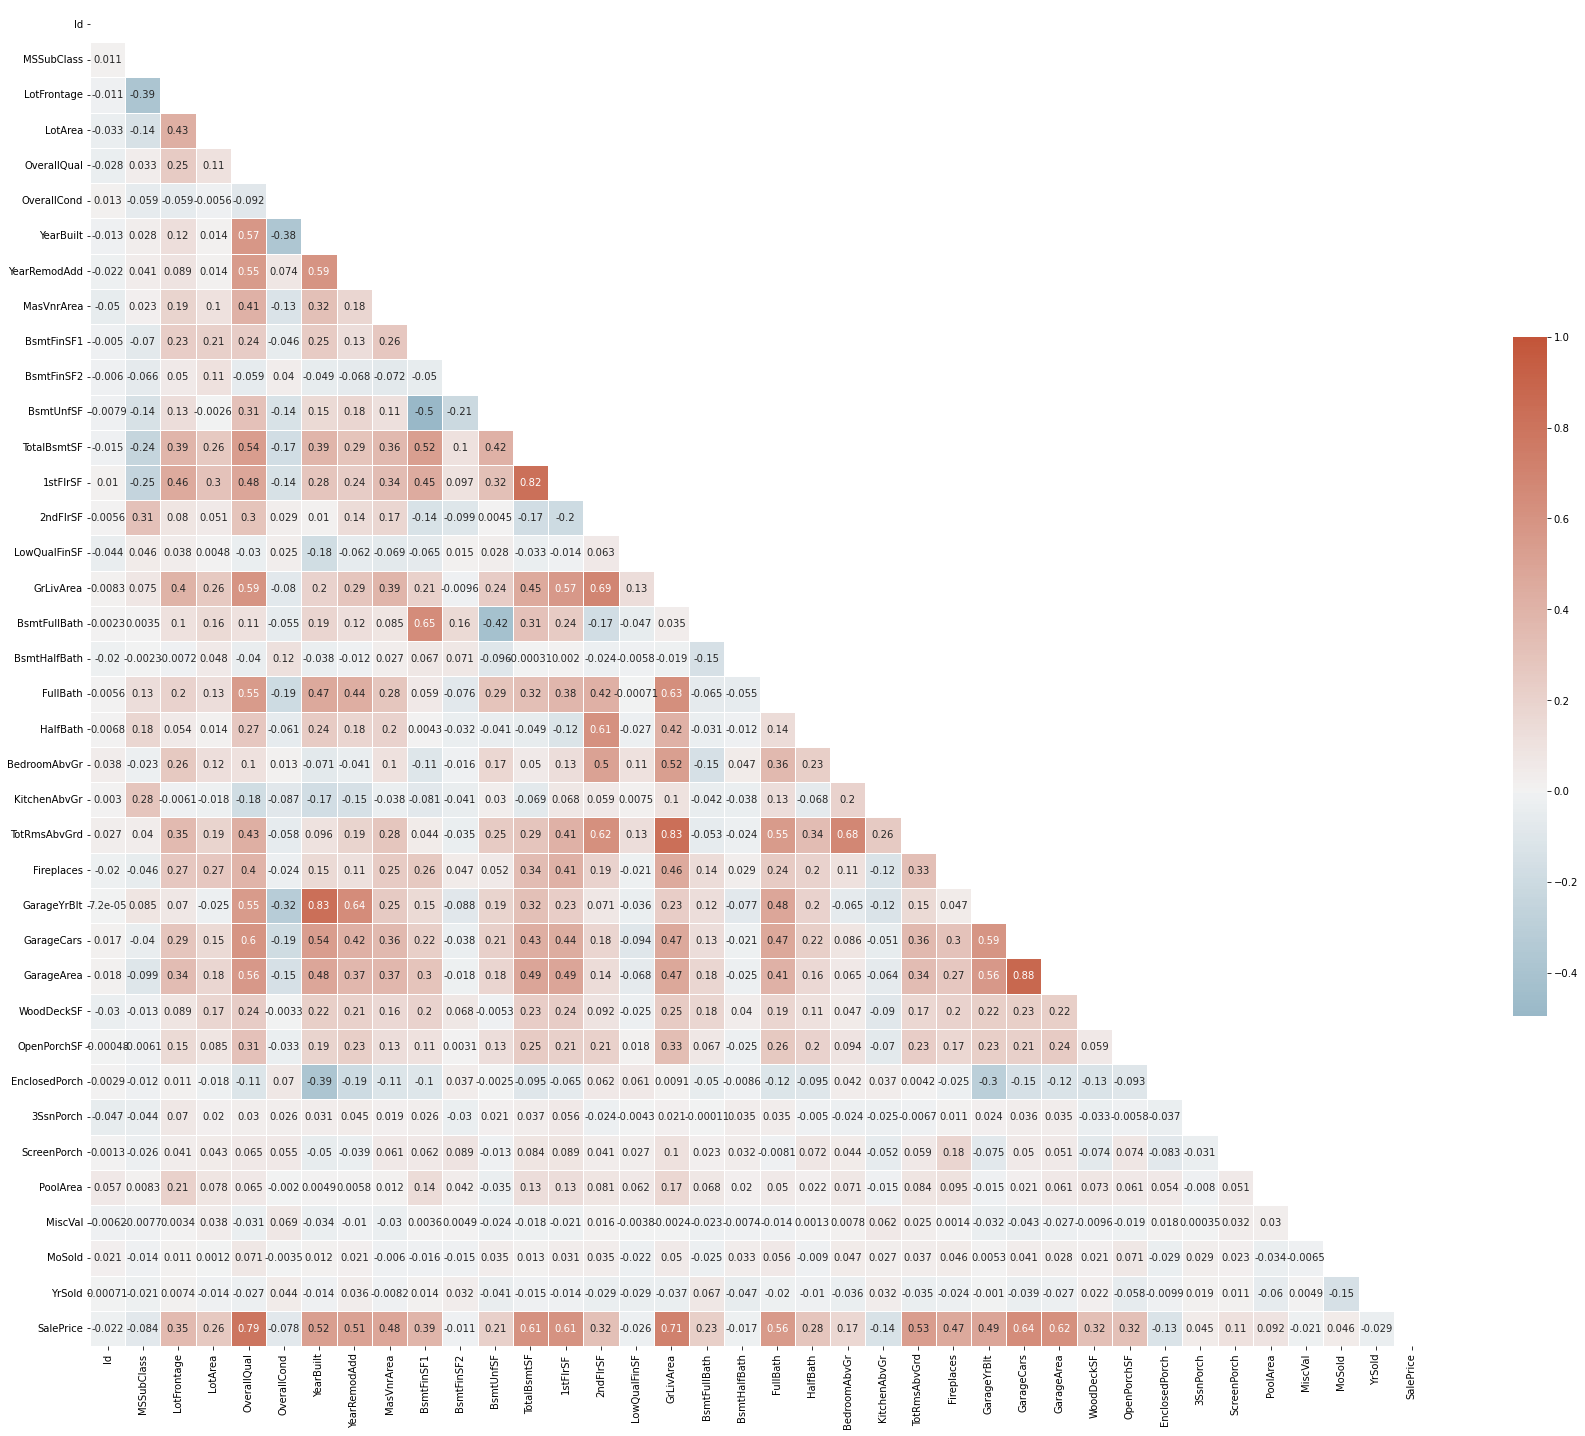

In [16]:
f, ax = plt.subplots(figsize=(30, 25))
mat = data_train.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

'OverallQual' and  'GrLivArea' has a high correlation with target. <br>
In addition to 'GarageCars' & 'GarageArea' which suspected as correlative features to each other (in the sense that a garage containing more cars has to have a larger area of square feet). <br>
we will check it out in advanced feature engineering and get rid in case of high correlation between those features to avoid unnecessary weight on target.

## Columns Parallelization Check:

Is all train data columns equivalent to test data columns:

In [17]:
def col_check(df1,df2):
    c = 0
    if len(df1.columns) - len(df2.columns) == 0:
        print('Data Frames has equal quantity of columns.')
    for i,col in enumerate(df1.columns):
        if col != df2.columns[i]:
            print(i)
            c = 1
    if c == 0:
        print('Test & Train datasets columns equivalent to each other.')
    else:
        print('Data Frames columns has differents columns or columns order that need a check.')

In [18]:
col_check(data_train,data_test)

Data Frames has equal quantity of columns.
Test & Train datasets columns equivalent to each other.


## Null Check:

In [19]:
def na_percent(df,tot_percent_nan):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    percent = percent.round(2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data.Percent>tot_percent_nan]

### More than 15% null in column:

In [20]:
na_percent(data_train,15)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74


when more than 15% of the data is missing, we should delete the corresponding variable. <br>
More than 80% effecting as bias to the model, droping all feature with more than 80% null. <br>
But as we can see in 'data_description' textfile except 'LotFrontage' feature all other features has nan as not availible in the regard of not availible in the property.<br>
In summary, we will drop all mentioned above features but 'FireplaceQu'.

In [21]:
data_train.drop(columns=['PoolQC' , 'MiscFeature' , 'Alley' , 'Fence' ,'LotFrontage'],inplace = True)

In [22]:
data_test.drop(columns=['PoolQC' , 'MiscFeature' , 'Alley' , 'Fence' ,'LotFrontage'],inplace = True)

Test data as well as the train data.

### convert not exist property component to none as not exist

In [23]:
# def of convert not exist property component from nan value to none as not exist.

def con_to_fill_na(df,feature_name):
    df[feature_name].fillna(value = 'none' , inplace = True)

In [24]:
# List of feature which contained nan atributes as defenition of not exist:
con_to_fill_na(data_train,'FireplaceQu')
con_to_fill_na(data_test,'FireplaceQu')

In [25]:
na_percent(data_train,0).reset_index()

,index,Total,Percent
0,GarageType,81,5.55
1,GarageYrBlt,81,5.55
2,GarageFinish,81,5.55
3,GarageQual,81,5.55
4,GarageCond,81,5.55
5,BsmtExposure,38,2.60
6,BsmtFinType2,38,2.60
7,BsmtFinType1,37,2.53
8,BsmtQual,37,2.53
9,BsmtCond,37,2.53


### Garage Handle:

In [26]:
# Check up isnt all na observations not exist duplicates.
len(data_train.loc[:,'GarageType':'GarageCond'][data_train.loc[:,'GarageType':'GarageCond'].isnull().any(axis=1)])

81

There is no nulls duplicates of 'Garage' features in the train data.

In [27]:
na_percent(data_test,0).reset_index()

,index,Total,Percent
0,GarageCond,78,5.35
1,GarageYrBlt,78,5.35
2,GarageFinish,78,5.35
3,GarageQual,78,5.35
4,GarageType,76,5.21
5,BsmtCond,45,3.08
6,BsmtExposure,44,3.02
7,BsmtQual,44,3.02
8,BsmtFinType2,42,2.88
9,BsmtFinType1,42,2.88


In [28]:
# Check up isnt all na observations not exist duplicates.
len(data_test.loc[:,'GarageType':'GarageCond'][data_test.loc[:,'GarageType':'GarageCond'].isnull().any(axis=1)])

78

no duplicates on all garage features (test & train). <br>
fill na as none in garage features since all na observations represents no garage.

In [29]:
non_l = na_percent(data_test,0).reset_index().head(5)['index'].to_list()
for i in non_l:
    con_to_fill_na(data_train,i)
    con_to_fill_na(data_test,i)

### Basment Handle:

In [30]:
na_percent(data_train,0).reset_index()[:5]

,index,Total,Percent
0,BsmtExposure,38,2.60
1,BsmtFinType2,38,2.60
2,BsmtQual,37,2.53
3,BsmtCond,37,2.53
4,BsmtFinType1,37,2.53


In [31]:
na_percent(data_test,0).reset_index()[:5]

,index,Total,Percent
0,BsmtCond,45,3.08
1,BsmtExposure,44,3.02
2,BsmtQual,44,3.02
3,BsmtFinType2,42,2.88
4,BsmtFinType1,42,2.88


In [32]:
print('Basement columns, any train data na: ',len(data_train.loc[:,'BsmtQual':'TotalBsmtSF'][data_train.loc[:,'BsmtQual':'TotalBsmtSF'].isnull().any(axis=1)]))
print('Basement columns, any test data na: ',len(data_test.loc[:,'BsmtQual':'TotalBsmtSF'][data_test.loc[:,'BsmtQual':'TotalBsmtSF'].isnull().any(axis=1)]))

Basement columns, any train data na:  39
Basement columns, any test data na:  49


Basement features has duplicates and doesnt has significant correlation and influens on sale price prediction.<br>
due these indicates better to drop all basement columns.

In [33]:
bsmt_features_to_drop = na_percent(data_train,0).reset_index().head(5)['index'].to_list()
data_train.drop(bsmt_features_to_drop,axis=1,inplace = True)
data_test.drop(bsmt_features_to_drop,axis=1,inplace = True)

### Drop na observations:

In [34]:
na_percent(data_train,0).reset_index()

,index,Total,Percent
0,MasVnrType,8,0.55
1,MasVnrArea,8,0.55
2,Electrical,1,0.07


In [35]:
na_percent(data_test,0).reset_index()

,index,Total,Percent
0,MasVnrType,16,1.10
1,MasVnrArea,15,1.03
2,MSZoning,4,0.27
3,Utilities,2,0.14
4,BsmtHalfBath,2,0.14
5,Functional,2,0.14
6,BsmtFullBath,2,0.14
7,BsmtFinSF1,1,0.07
8,GarageArea,1,0.07
9,KitchenQual,1,0.07


As we can see all the rest of the features hasn't any exist pronlem and the na observations amount is to low to drop the entire column. <br>
As a result, drop all shown above observations.


In [36]:
t1 = na_percent(data_train,0).reset_index()['index'].to_list()
t2 = na_percent(data_test,0).reset_index()['index'].to_list()
data_train.dropna(axis = 0, subset=t1,inplace=True)
data_test.dropna(axis = 0, subset=t2,inplace=True)

In [37]:
na_percent(data_train,0).reset_index()

,index,Total,Percent


In [38]:
na_percent(data_test,0).reset_index()

,index,Total,Percent


In [39]:
data_test_res = pd.DataFrame({'Id': data_test['Id'], 'SalePrice': data_test['SalePrice']})
data_test_res

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [40]:
# due to has no further contribution to analysis Drop Id columns.
data_train.drop('Id', axis = 1, inplace = True)
data_test.drop('Id', axis = 1, inplace = True)

In [41]:
data_train.reset_index(inplace=True,drop=True)
data_test.reset_index(inplace=True,drop=True)

# Data Analisys and Features Engineer:

## Target Engineer:

In [42]:
#descriptive statistics summary
data_train['SalePrice'].describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

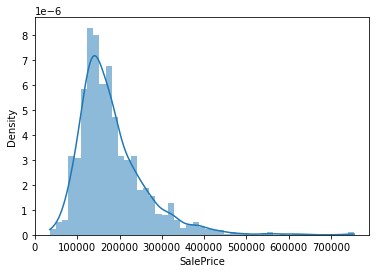

In [43]:
#histogram
sns.histplot(data_train.loc[:,'SalePrice'],kde=True, stat="density", linewidth=0)

As we can see upwards, the sale price ditribution has a positive skewness.

In [44]:
#skewness and kurtosis measureness
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.883111
Kurtosis: 6.573025


The target's skewness is better than 1 and Kurtosis = 6.5 which meaning highly skewed with a large tail. <br>
Skewed distribiotion can demage due to the outliers. <br>
In-addition, regression model based on assumption of normal distribution case. <br>
This target varibale is right skewed. <br>
Now, we need to tranform this variable by log and make it more normal distribution.

### Log the Target:

Original:
Skewness: 1.883111
Kurtosis: 6.573025

Log Transformation:
Skewness: 0.121938
Kurtosis: 0.802538

Square Root Transformation:
Skewness: 0.942004
Kurtosis: 1.954103

Cube Root Transformation:
Skewness: 0.666070
Kurtosis: 1.261133


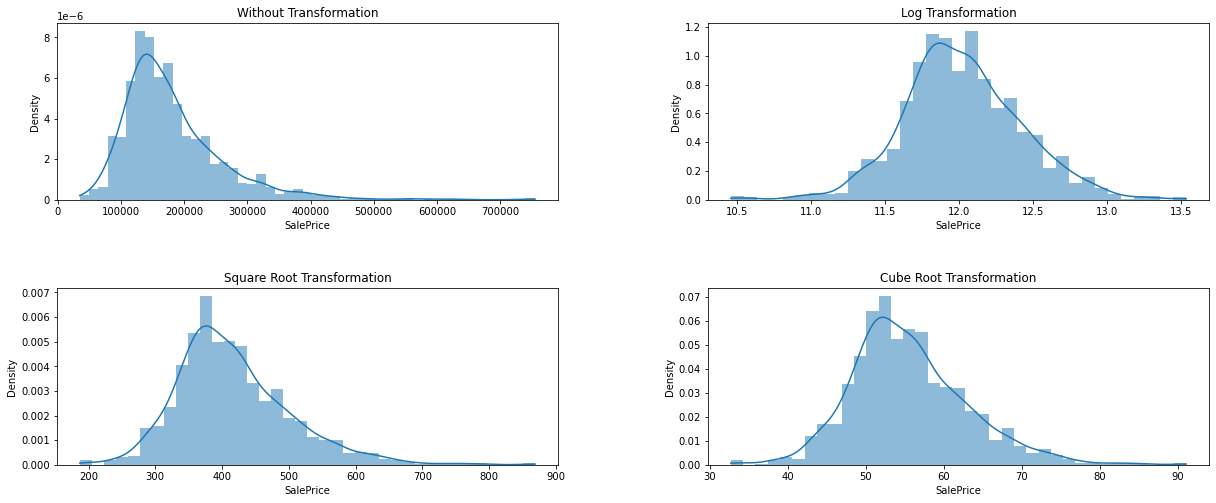

In [45]:
# For normelize the target we will seek for the best transformation aiming for skew = 0 with the lowest Kurtosis.

fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)

# Without Transformation:
print('Original:')
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())
ax1 = fig.add_subplot(15,2,1)
sns.histplot(data_train.loc[:,'SalePrice'],kde=True, stat="density", linewidth=0)

# Log Transformation:
print('\nLog Transformation:')
x1 = np.log(data_train['SalePrice'])
print("Skewness: %f" % x1.skew())
print("Kurtosis: %f" % x1.kurt())
ax2 = fig.add_subplot(15,2,2)
sns.histplot(x1,kde=True, stat="density", linewidth=0)

# Square Root Transformation
x2 = np.sqrt(data_train['SalePrice'])
print('\nSquare Root Transformation:')
print("Skewness: %f" % x2.skew())
print("Kurtosis: %f" % x2.kurt())
ax3 = fig.add_subplot(15,2,3)
sns.histplot(x2,kde=True, stat="density", linewidth=0)

# Cube Root Transformation
x3 = np.cbrt(data_train['SalePrice'])
print('\nCube Root Transformation:')
print("Skewness: %f" % x3.skew())
print("Kurtosis: %f" % x3.kurt())
ax4 = fig.add_subplot(15,2,4)
sns.histplot(x3,kde=True, stat="density", linewidth=0)



ax1.title.set_text("Without Transformation")
ax2.title.set_text("Log Transformation")
ax3.title.set_text("Square Root Transformation")
ax4.title.set_text("Cube Root Transformation")

plt.show()

ohhh nice! <br>
As most of the times Log Transformation normelized efficiently and convert the distribution to be fairly symmetrical. <br>
Best Chose EVER! ;)

In [46]:
# Lets make the chosen transformation to the target:
data_train['SalePrice'] = np.log(data_train['SalePrice'])
data_test['SalePrice'] = np.log(data_test['SalePrice'])

## Time Handle

In [47]:
data_train[['MoSold','YrSold']].sort_values(['YrSold','MoSold'])

,MoSold,YrSold
141,1,2006
169,1,2006
301,1,2006
369,1,2006
410,1,2006
...,...,...
418,7,2010
702,7,2010
1138,7,2010
1154,7,2010


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

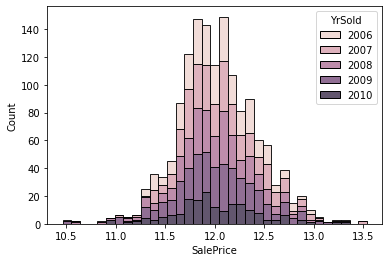

In [48]:
sns.histplot(data_train, x = 'SalePrice' ,  hue = 'YrSold',multiple="stack")

In [49]:
# Group by years and insert into datafarame
yr_df = pd.DataFrame(round(data_train.groupby('YrSold')['SalePrice'].sum(),2))

# supplement the missing 5 month in 2010.
yr_df.loc[2010,'SalePrice'] = round(yr_df.loc[2010,'SalePrice']+yr_df.loc[2010,'SalePrice']*5/7,2)

# Adds year over year percentage checng
yr_df['%_Change_YoY'] = round(np.log(yr_df['SalePrice']/yr_df['SalePrice'].shift())*100,2)

yr_df

,SalePrice,%_Change_YoY
YrSold,,
2006,3765.94,NaN
2007,3940.25,4.52
2008,3603.57,-8.93
2009,4046.83,11.60
2010,3579.26,-12.28


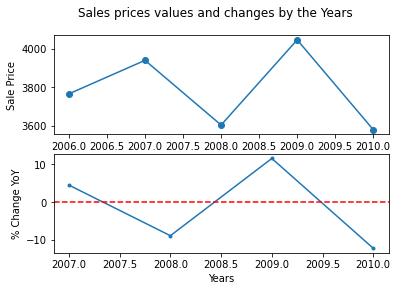

In [50]:
# plot the Sales prices values and changes over each Years in 2 charts on top of each other

plt.suptitle('Sales prices values and changes by the Years')

plt.subplot(2, 1, 1)
plt.plot(yr_df.index, yr_df['SalePrice'], 'o-')
plt.ylabel('Sale Price')

plt.subplot(2, 1, 2)
plt.plot(yr_df.index, yr_df['%_Change_YoY'], '.-')
plt.xlabel('Years')
plt.ylabel('% Change YoY')
plt.axhline(y = 0, color = 'r', linestyle = 'dashed')

plt.show()

Great, no time series needed on our time frame data. <br>
The low transactions volume in 2008 can be explained due to the subprime mortgage crisis <br>
The low transactions volume in 2010 can be resulted of strong and weak seasons.  <br>
As we can see, there is no consistency over the years in the data due to economic instability and missing half of 2010 original data, better drop the year sold feature. <br><br>
Now let's check if there is a stronger and weeker monthes?

In [51]:
data_train[['YrSold','MoSold','SalePrice']].sort_values(['YrSold','MoSold','SalePrice'])

,YrSold,MoSold,SalePrice
1395,2006,1,11.561716
990,2006,1,11.824080
410,2006,1,11.884489
1034,2006,1,11.951180
369,2006,1,12.057573
...,...,...,...
1138,2010,7,11.289782
1412,2010,7,11.755872
418,2010,7,11.863582
1154,2010,7,11.891362


In [52]:
# Check to delete
# drop 2010
mo_df = data_train[['MoSold','YrSold','SalePrice']].sort_values(['YrSold','MoSold','SalePrice'])
mo_df.drop(mo_df.YrSold[mo_df['YrSold'] == 2010].index,axis =0,inplace=True)

# Group by monthes and sum each month
mo_df = pd.DataFrame(round(mo_df.groupby('MoSold')['SalePrice'].sum(),2))
mo_df['%_Change_YoY'] = round(np.log(mo_df['SalePrice']/mo_df['SalePrice'].shift())*100,2)

# print the dataframe
mo_df

,SalePrice,%_Change_YoY
MoSold,,
1,574.31,NaN
2,446.12,-25.26
3,996.27,80.34
4,1221.01,20.34
5,1844.26,41.24
6,2608.33,34.66
7,2748.20,5.22
8,1457.86,-63.40
9,749.16,-66.58


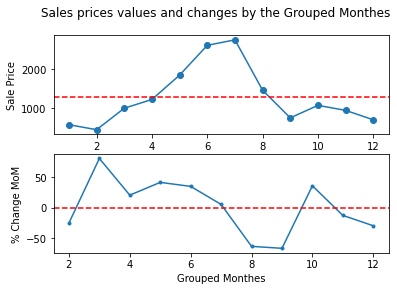

In [53]:
# plot the Sales prices grouped by the monthes sum values and changes over each month in 2 charts on top of each other


plt.subplot(2, 1, 1)
plt.suptitle('Sales prices values and changes by the Grouped Monthes')

plt.plot(mo_df.index, mo_df['SalePrice'], 'o-')
plt.ylabel('Sale Price')
plt.axhline(y = np.mean(mo_df['SalePrice']), color = 'r', linestyle = 'dashed')



plt.subplot(2, 1, 2)
plt.plot(mo_df.index , mo_df['%_Change_YoY'], '.-')
plt.xlabel('Grouped Monthes')
plt.ylabel('% Change MoM')
plt.axhline(y = 0, color = 'r', linestyle = 'dashed')

plt.show()

As we can see the first half of the year has better momentum prices than getting weaker later in the year.<br> 
Also, better Try to sell a house between April to August when the prices is higher than average.

In summary, we will drop the year sold due to unneccesary feature, and about the month we will change the feature with min max tool latter in the features engineer.

In [54]:
# Dropping the year feature
data_train.drop('YrSold', axis =1, inplace = True)
data_test.drop('YrSold', axis =1, inplace = True)

## High correlation between features 
## In-addition, each high correlative feature infront target

High correlation between feature can demage the wights againts the target prediction make a over fit prediction model.<br>
We gonna detect all high correlated features (not include target), display the correlation of those features with 'target' and finaly drop the low correlative feature regard to target.<br>
By the general convention of high/moderate/low correlations ranges, the high correlation should pass 65%.

In [55]:
def fine_high_corr_features(df):
    # Find all high correlations cross all features:
    corr_matrix = df.drop('SalePrice', axis=1).corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().sort_values(ascending=False))
    sol_a = sol[sol>0.65]
    return sol_a

def corr_w_tar(df):
    # Write the features (the series indexes) into dataframe and the correlation between theme:
    f_1 = []
    f_2 = []
    for i,j in enumerate(sol_a.index.to_list()):
        f_1.append(j[0])
        f_2.append(j[1])
    temp_df = pd.DataFrame()
    temp_df['f_1'] = f_1 # feature_1
    temp_df['f_2'] = f_2 # feature_2
    temp_df['feature_corr'] = sol_a.values.tolist() # correlation between feature_1 to feature_2


    # all output columns is type int, use pearson’s correlation to find corr with target
    f1_t_corr = []
    f2_t_corr = []
    for i in range(len(temp_df)):
        corr, _ = pearsonr(df[temp_df['f_1'][i]],df['SalePrice'])
        f1_t_corr.append(corr)
        corr, _ = pearsonr(df[temp_df['f_2'][i]],df['SalePrice'])
        f2_t_corr.append(corr)

    temp_df['f1_t_corr'] = f1_t_corr # correlation between feature_1 to target
    temp_df['f2_t_corr'] = f2_t_corr # correlation between feature_2 to target
    return(temp_df)

sol_a = fine_high_corr_features(data_train)
temp_df = corr_w_tar(data_train)
temp_df

,f_1,f_2,feature_corr,f1_t_corr,f2_t_corr
0,GarageCars,GarageArea,0.882470,0.679799,0.649994
1,GrLivArea,TotRmsAbvGrd,0.825563,0.701473,0.536265
2,TotalBsmtSF,1stFlrSF,0.818107,0.612140,0.598305
3,2ndFlrSF,GrLivArea,0.690403,0.321496,0.701473
4,BedroomAbvGr,TotRmsAbvGrd,0.675590,0.212029,0.536265


Scatter plot of high correlative feature with target:

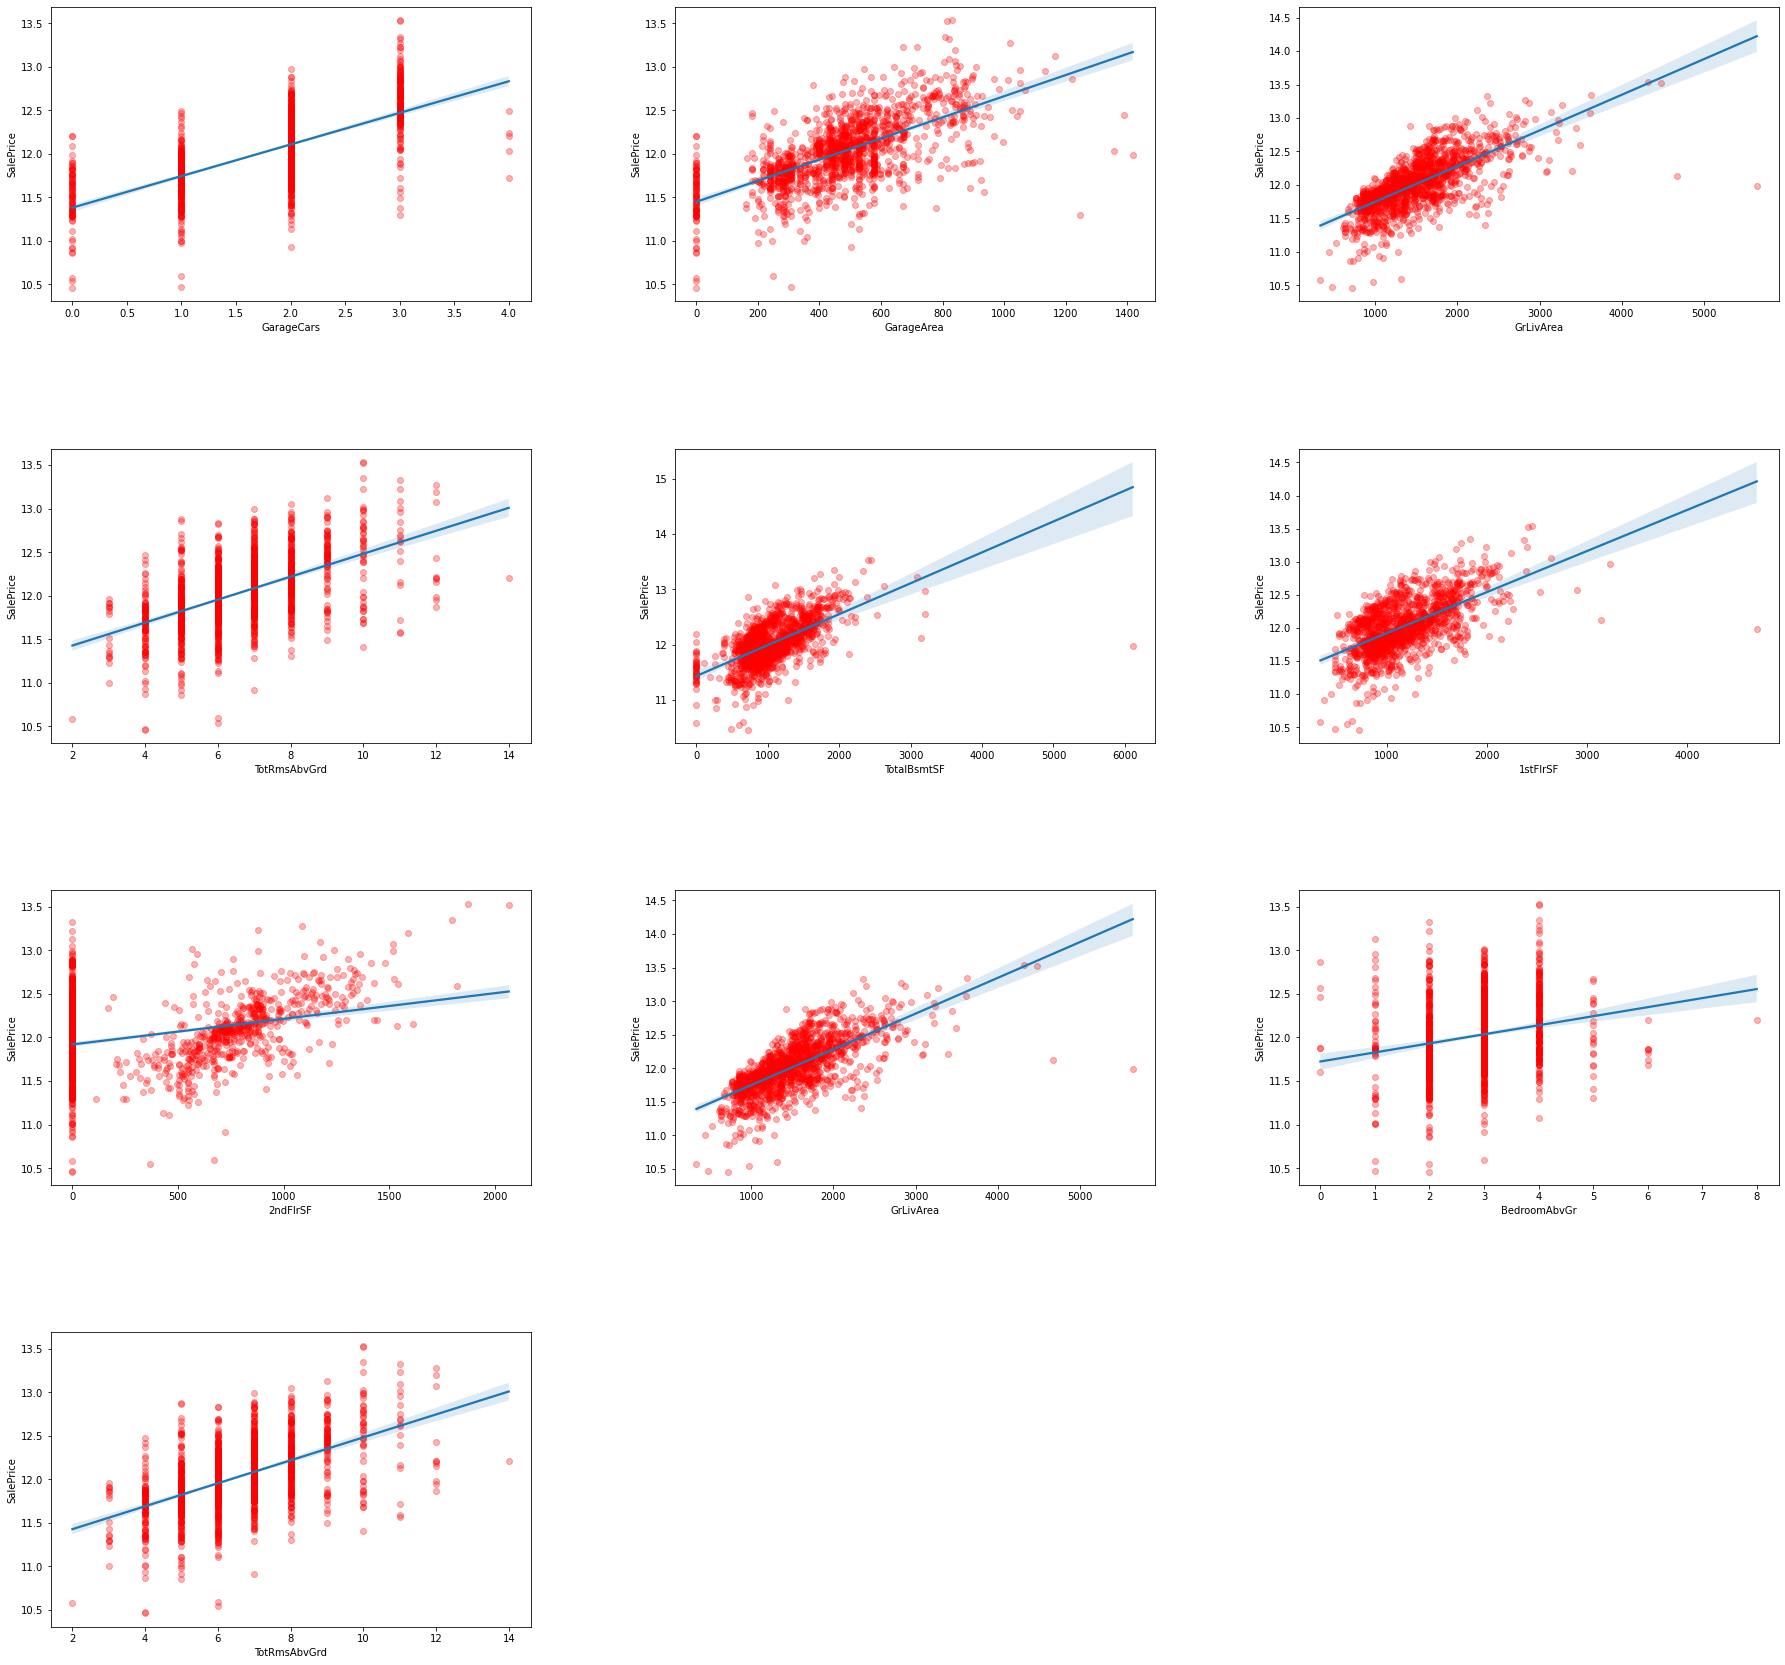

In [56]:
t1 = []
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)

for i in range(len(temp_df)):
    for j in temp_df:
        if type(temp_df.loc[i,j]) == str:
            t = temp_df.loc[i,j]
            t1.append(t)
l = 0
for i in t1:
    plt.subplot(15,3,l+1)
    l+=1
    sns.regplot(x=i, y= "SalePrice", data=data_train, scatter_kws={"color": "red",'alpha':0.3})

By the chart above we can see features which requires transformations. <br>
Will explore more about it in foreward phase.

Drop the lower correlative feature with target among high correlative features:

In [57]:
low_corr_with_target = []
for i,j in enumerate(temp_df):
    for index in range(len(temp_df)):
        if j == 'f1_t_corr':
            if temp_df.loc[index,j]>temp_df.iloc[index,i+1]:
                low_corr_with_target.append(temp_df.iloc[index,i-2])
            else:
                low_corr_with_target.append(temp_df.iloc[index,i-3])
print('Listed names of lower correletion features to drop: ',low_corr_with_target)
data_train.drop(columns = low_corr_with_target,inplace = True)
data_test.drop(columns = low_corr_with_target,inplace = True)

Listed names of lower correletion features to drop:  ['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']


## Constant Features:

In [58]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold

In [59]:
def num_cat_split(df):
    
    # Split train data to numeric and categorical features
    data_t_num = df.drop('SalePrice', axis = 1).select_dtypes(exclude ='object').copy()
    data_t_cat = df.drop('SalePrice', axis = 1).select_dtypes(include='object').copy()
    
    # category & numeric data orgenize by information meaning.
    try:
        data_t_cat = pd.concat([data_t_cat,data_t_num.loc[:,['OverallQual','OverallCond','MoSold']]],axis=1)
        data_t_num.drop(['OverallQual','OverallCond','MoSold'] , axis = 1 , inplace=True)
        return data_t_cat, data_t_num
    except:
        data_t_cat = pd.concat([data_t_cat,data_t_num.loc[:,['OverallQual']]],axis=1)
        data_t_num.drop(['OverallQual'] , axis = 1 , inplace=True)
        return data_t_cat, data_t_num
    
data_train_cat, data_train_num = num_cat_split(data_train)
data_test_cat, data_test_num = num_cat_split(data_test)

Features which expresses in the data as numeric but better appropriate to categorical features. since has limited number of numeric options in those features:<br>
names: 'OverallQual', 'OverallCond', and 'MoSold'

### Category and numeric features summary:

In [60]:
def cat_num_summary(df,df_cat,df_num):
    print('All features --->', len(df.drop('SalePrice', axis = 1).columns),'\n\n')
    print('\nNumerical Features Number --->', len(df_num.columns),'\n')
    print('Numeric Features Names:',df_num.columns,'\n\n')
    print('Categorical Features Number --->', len(df_cat.columns),'\n')
    print('Categorical Features Names:',df_cat.columns)

cat_num_summary(data_train,data_train_cat,data_train_num)

All features ---> 63 



Numerical Features Number ---> 25 

Numeric Features Names: Index(['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object') 


Categorical Features Number ---> 38 

Categorical Features Names: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
    

In [61]:
# drop column where 85% of the values are constant
th = VarianceThreshold(threshold=0.15)
th.fit(data_train[data_train_num.columns])

# print the retained features
print(f"Number of numeric retained features: {sum(th.get_support())}")

# print number of the quasi-constant features
print(f"\nNumber of quasi-constant features: {len(data_train_num.columns) - sum(th.get_support())}")

# list the quasi-constant features names
quasi_constant_features_list = [x for x in data_train[data_train_num.columns].columns
                                if x not in data_train[data_train_num.columns].columns[th.get_support()]]
print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from data_train & data_test
data_train.drop(quasi_constant_features_list, axis=1, inplace=True)
data_test.drop(quasi_constant_features_list, axis=1, inplace=True)


Number of numeric retained features: 23

Number of quasi-constant features: 2

Quasi-constant features to be dropped: ['BsmtHalfBath', 'KitchenAbvGr']


## Skew Handle

### Skew Check Features:

In regression models there is assuming of normal distribution features

In [62]:
# split again to apdate after droping features
data_train_cat, data_train_num = num_cat_split(data_train)
data_test_cat, data_test_num = num_cat_split(data_test)

In [63]:
# find and collect all skewed features to a list
def find_skew_features(df_num,df):
    # Select features with absolute Skew higher than 0.5
    skew = []

    for i in df_num.columns:
        # list of skew for each corresponding feature
        skew.append(abs(df[i].skew()))

    df_skewed = pd.DataFrame({"Columns": df_num.columns,
                             "Abs_Skew": skew})
    # Take only the skewed features which larger than absolute 0.65.
    skew_features = df_skewed[df_skewed["Abs_Skew"] > 0.65]["Columns"].tolist()
    return(skew_features)


In [64]:
def tran_skew_features(sk_f,df):
    for i in sk_f:
        print(i)
        x = abs(df[i].skew())
        print("Skewness: %f" % df[i].skew())
        x1 = abs(np.log(df[i]+1).skew())
        x2 = abs(np.sqrt(df[i]).skew())
        x3 = abs(np.cbrt(df[i]).skew())            
        
        if x1 == min(x,x1,x2,x3):
            df[i] = np.log(df[i]+1)

        elif x2 == min(x,x1,x2,x3):
            df[i] = np.sqrt(df[i])

        elif x3 == min(x,x1,x2,x3):
            df[i] = np.cbrt(df[i])


        print('Skewness After Transformation:', df[i].skew())
        print('*'*50)
    return(df)

In [65]:
# Find all skewed features for train data
data_train_skew_features = find_skew_features(data_train_num,data_train)
print('Skewed features Before transformation --> ',len(data_train_skew_features),'\nFetures Names:', data_train_skew_features,'\n\n\n')


# Apply the transformation on all skewed features and observe the changes for train data
data_train = tran_skew_features(data_train_skew_features,data_train)


# Find all still skewed features after transformation for train data
data_train_skew_features = find_skew_features(data_train_num,data_train)
print('\n\n\nSkewed features After transformation --> ',len(data_train_skew_features),'\nFetures Names:', data_train_skew_features)

Skewed features Before transformation -->  17 
Fetures Names: ['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] 



MSSubClass
Skewness: 1.408299
Skewness After Transformation: 0.24975168309211213
**************************************************
LotArea
Skewness: 12.235742
Skewness After Transformation: -0.1424512540493921
**************************************************
MasVnrArea
Skewness: 2.668016
Skewness After Transformation: 0.4932739961231234
**************************************************
BsmtFinSF1
Skewness: 1.702582
Skewness After Transformation: -0.027332225644350023
**************************************************
BsmtFinSF2
Skewness: 4.240230
Skewness After Transformation: 2.5125530383186163
**************************************************
BsmtUnfSF
Skewness: 0.919977
Skewness Afte

In [66]:
# Check if the traformed skewed features have a significant weight on target:

temp_df = pd.DataFrame()
temp_df['skewed_features'] = data_train_skew_features # feature_1

# all output columns is numeric type, better use pearson’s correlation to find corr with target
f1_t_corr = []
for i in data_train_skew_features:
    corr, _ = pearsonr(data_train[i],data_train['SalePrice'])
    f1_t_corr.append(corr)
    
temp_df['corr_with_target'] = f1_t_corr # correlation between feature_1 to target
temp_df


,skewed_features,corr_with_target
0,BsmtFinSF2,-0.028978
1,TotalBsmtSF,0.580153
2,LowQualFinSF,-0.054120
3,EnclosedPorch,-0.207778
4,3SsnPorch,0.059542
5,ScreenPorch,0.107424
6,PoolArea,0.070448
7,MiscVal,-0.066465


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

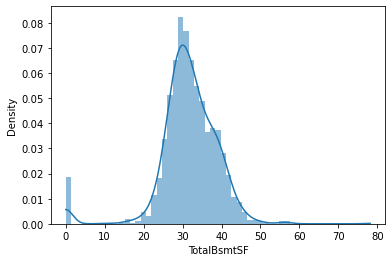

In [67]:
#histogram
sns.histplot(data_train.loc[:,'TotalBsmtSF'],kde=True, stat="density", linewidth=0)

Feature explaining - 'TotalBsmtSF': Total square feet of basement area. <br>
The 0 case have Legitimate in case of the property hasn't basement at all.<br>
Regard to the circumstances and refer to the high correlation, better not drop the 'TotalBsmtSF' feature.<br>
All the rest of unseccesfull transformed skewed features with low correlative, can be dropped.

In [68]:
data_train_skew_features.remove('TotalBsmtSF')
data_train.drop(data_train_skew_features, axis = 1 , inplace=True)

Data test skewed features transformation:

In [69]:
# Find all skewed features for test data
data_test_skew_features = find_skew_features(data_test_num,data_test)
print('Skewed features Before transformation --> ',len(data_test_skew_features),'\nFetures Names:', data_test_skew_features,'\n\n\n')

# Apply the transformation on all skewed features and observe the changes for test data
data_test = tran_skew_features(data_test_skew_features,data_test)

# Find all skewed features after transformation for test data
data_test_skew_features = find_skew_features(data_test_num,data_test)
print('\n\n\nSkewed features After transformation --> ',len(data_test_skew_features),'\nFetures Names:' ,data_test_skew_features)

Skewed features Before transformation -->  18 
Fetures Names: ['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] 



MSSubClass
Skewness: 1.335707
Skewness After Transformation: 0.23596149230532956
**************************************************
LotArea
Skewness: 2.703860
Skewness After Transformation: -0.07125302844900616
**************************************************
MasVnrArea
Skewness: 2.527381
Skewness After Transformation: 0.5465300553663693
**************************************************
BsmtFinSF1
Skewness: 1.162921
Skewness After Transformation: -0.006584232145153942
**************************************************
BsmtFinSF2
Skewness: 4.037738
Skewness After Transformation: 2.394805457006403
**************************************************
BsmtUnfSF
Skewness: 0.929682


unfortunately the skewed features on the train and test data is not exactly the same. <br>
Still, we need to drop as well as we droped in the train data also in the test data.

In [70]:
data_test.drop(data_train_skew_features,axis=1,inplace=True)

## Strong Correlation

In [71]:
df_num_corr = data_train.corr()["SalePrice"][:-1]

# strong corr list:
# Correlated features (r2 > 0.65): very weak relationship with SalePrice
strong_corr_features = df_num_corr[abs(df_num_corr) > 0.65].sort_values(ascending=False)
print(f"{len(strong_corr_features)} weakly correlated values with SalePrice:\n{strong_corr_features}\n")

strong_corr_features_list = df_num_corr[abs(df_num_corr) > 0.65].index.tolist()

3 weakly correlated values with SalePrice:
OverallQual    0.816617
GrLivArea      0.730620
GarageCars     0.679799
Name: SalePrice, dtype: float64



# Scale:

## Scale for regression models:

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [73]:
# split again to apdate after droping features
data_train_cat, data_train_num = num_cat_split(data_train)
data_test_cat, data_test_num = num_cat_split(data_test)

In [74]:
# For smooth the categorical transform better change the dtype to str
data_train[data_train_cat.columns.to_list()] = data_train[data_train_cat.columns.to_list()].astype(str)
data_test[data_test_cat.columns.to_list()] = data_test[data_test_cat.columns.to_list()].astype(str)

In [75]:
preprocess = make_column_transformer((OneHotEncoder(categories="auto"),
                                      data_train_cat.columns.to_list()),
                                      remainder=StandardScaler())

feature_dataset = data_train.drop('SalePrice',axis=1)
feature_dataset_test = data_test.drop('SalePrice',axis=1)

#fit_transform is the function that fits the transformations to the data and then does the transformation
X = preprocess.fit_transform(feature_dataset)
X_test = preprocess.fit_transform(feature_dataset_test)


# scale target dataset
y = data_train['SalePrice']
y_test = np.array(data_test['SalePrice'])

## Scale for trees models:

Tree models don't need an Ordinal Scale even better use with label-encoding


In [76]:
# list of the objects of strings features to transform to numbers:
t_col_scale = data_train_cat.columns.to_list()

# as well for data test
t2_col_scale = data_test_cat.columns.to_list()

In [77]:
scaler = OrdinalEncoder()
d = scaler.fit_transform(data_train.loc[:,t_col_scale])
scaled_df = pd.DataFrame(d,columns =  t_col_scale)
scaled_df.tail(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,OverallQual,OverallCond,MoSold
1449,3.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,...,36.0,2.0,4.0,4.0,2.0,8.0,4.0,5.0,5.0,6.0
1450,3.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,...,51.0,0.0,4.0,4.0,2.0,8.0,4.0,5.0,5.0,8.0


In [78]:
d2 = scaler.fit_transform(data_test.loc[:,t2_col_scale])
scaled_df2 = pd.DataFrame(d2,columns =  t2_col_scale)
scaled_df2.tail(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,OverallQual,OverallCond,MoSold
1429,3.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,...,96.0,3.0,4.0,5.0,2.0,8.0,4.0,4.0,4.0,9.0
1430,3.0,1.0,3.0,3.0,0.0,4.0,1.0,11.0,2.0,2.0,...,78.0,0.0,3.0,4.0,2.0,8.0,4.0,6.0,4.0,2.0


In [79]:
for i in range(len(scaler.categories_)):
    for j in range(len(scaler.categories_[i])):
        if j == 0:
            print(data_train.loc[:,t_col_scale].columns[i],"atributes:")
        print(j," = " , scaler.categories_[i][j])
    print("\n")

MSZoning atributes:
0  =  C (all)
1  =  FV
2  =  RH
3  =  RL
4  =  RM


Street atributes:
0  =  Grvl
1  =  Pave


LotShape atributes:
0  =  IR1
1  =  IR2
2  =  IR3
3  =  Reg


LandContour atributes:
0  =  Bnk
1  =  HLS
2  =  Low
3  =  Lvl


Utilities atributes:
0  =  AllPub


LotConfig atributes:
0  =  Corner
1  =  CulDSac
2  =  FR2
3  =  FR3
4  =  Inside


LandSlope atributes:
0  =  Gtl
1  =  Mod
2  =  Sev


Neighborhood atributes:
0  =  Blmngtn
1  =  Blueste
2  =  BrDale
3  =  BrkSide
4  =  ClearCr
5  =  CollgCr
6  =  Crawfor
7  =  Edwards
8  =  Gilbert
9  =  IDOTRR
10  =  MeadowV
11  =  Mitchel
12  =  NAmes
13  =  NPkVill
14  =  NWAmes
15  =  NoRidge
16  =  NridgHt
17  =  OldTown
18  =  SWISU
19  =  Sawyer
20  =  SawyerW
21  =  Somerst
22  =  StoneBr
23  =  Timber
24  =  Veenker


Condition1 atributes:
0  =  Artery
1  =  Feedr
2  =  Norm
3  =  PosA
4  =  PosN
5  =  RRAe
6  =  RRAn
7  =  RRNe
8  =  RRNn


Condition2 atributes:
0  =  Artery
1  =  Feedr
2  =  Norm
3  =  PosA
4  =  PosN

In [80]:
scaled_df = pd.concat([scaled_df,data_train.drop(columns = scaled_df.columns.to_list())],axis = 1)
scaled_df2 = pd.concat([scaled_df2,data_test.drop(columns = scaled_df2.columns.to_list())],axis = 1)

# Weak Correlation with Target to Prevent OverFitting

In [81]:
df_num_corr = scaled_df.corr()["SalePrice"][:-1]

# weak corr list:
# Correlated features (r2 < 0.2): very weak relationship with SalePrice
weak_features = df_num_corr[abs(df_num_corr) < 0.2].sort_values(ascending=False)
print(f"{len(weak_features)} weakly correlated values with SalePrice:\n{weak_features}\n")

weak_features_list = df_num_corr[abs(df_num_corr) < 0.2].index.tolist()

23 weakly correlated values with SalePrice:
RoofStyle      0.189116
ExterCond      0.147542
Functional     0.134277
Exterior2nd    0.124719
Exterior1st    0.120635
Condition1     0.116392
RoofMatl       0.108369
Street         0.057272
LandSlope      0.039590
LandContour    0.031132
GarageCond     0.020352
MoSold         0.018846
GarageQual     0.003593
Condition2     0.001464
Utilities     -0.012560
MasVnrType    -0.017451
MSSubClass    -0.018728
OverallCond   -0.034657
SaleType      -0.035326
BldgType      -0.072353
LotConfig     -0.074850
Heating       -0.139828
MSZoning      -0.188601
Name: SalePrice, dtype: float64



In [82]:
scaled_df.drop(weak_features_list,axis=1,inplace=True)
scaled_df2.drop(weak_features_list,axis=1,inplace=True)

# Split the data

## Split For Regeression models:

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

## Split For Trees models:

In [85]:
y2 = scaled_df.SalePrice
X2 = scaled_df.drop(['SalePrice'],axis = 1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Model:

## Regeression models

In [87]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
import timeit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

In [88]:
# Model evaluation
def regression_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted")
    print("MAE: ",mae.round(5))
    print("MSE: ", mse.round(5))
    print("RMSE: ", rmse)
    print("MAPE: ", mape.round(5))
    print("R²: ", r_score.round(5))

In [89]:
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
adaboost = AdaBoostRegressor(random_state=42)
bagging = BaggingRegressor(random_state=42)
gdboost = GradientBoostingRegressor(random_state=42)
xgbreg=XGBRegressor(random_state=42)

In [90]:
model = [ridge, lasso, adaboost, bagging, gdboost, xgbreg]
dict_model = {}

for model in model:
    model.fit(X_train2, y_train2)
    start_time = timeit.default_timer()
    y_pred = model.predict(X_test2)
    time = round(timeit.default_timer() - start_time,2)
    mae = mean_absolute_error(y_test2, y_pred)
    mse = mean_squared_error(y_test2, y_pred)
    rmse = np.sqrt(mse)
    r_score = r2_score(y_test2, y_pred, multioutput="variance_weighted").round(2)
#     dict_model[model] = (mae.round(3), mse.round(3), rmse.round(3), r_score, time)
    dict_model[model] = ('{0}'.format(mae.round(2), precision=1), '{0}'.format(mse.round(2), precision=1), 
                         '{0}'.format(rmse.round(2), precision=1), '{0}'.format(r_score, precision=1),time)

    
results = pd.DataFrame(dict_model, index=["MAE", "MSE", "RMSE", "R²","time"])
results.columns = ["Ridge", "Lasso", "AdaBoost", "Bagging", "GradientBoosting", "XGBoost Regressor"]

results


,Ridge,Lasso,AdaBoost,Bagging,GradientBoosting,XGBoost Regressor
MAE,0.09,0.3,0.13,0.1,0.09,0.1
MSE,0.02,0.15,0.03,0.02,0.02,0.02
RMSE,0.14,0.39,0.17,0.15,0.13,0.16
R²,0.87,-0.0,0.8,0.84,0.88,0.84
time,0.0,0.0,0.01,0.0,0.0,0.01


### Hyperparameter Tuned Best Regression Model:

In [91]:
param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],}

search = GridSearchCV(
        GradientBoostingRegressor(random_state=42), param_distributions,
        scoring="neg_mean_absolute_error", n_jobs=2, cv=5)

search.fit(X_train, y_train)
columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(search.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
t = cv_results[columns].sort_values(by="mean_test_error")
t.reset_index(inplace=True,drop=True)

In [92]:
best_regression_model=GradientBoostingRegressor(n_estimators=t.param_n_estimators[0],max_leaf_nodes=t.param_max_leaf_nodes[0])
best_regression_model.fit(X_train2,y_train2)

GradientBoostingRegressor(max_leaf_nodes=5, n_estimators=200)

In [93]:
y_pred= best_regression_model.predict(X_test2)
regression_metrics(np.array(y_test2), y_pred)

MAE:  0.0889
MSE:  0.01819
RMSE:  0.13488772629346424
MAPE:  0.00748
R²:  0.87788


## Tree models

In [94]:
forest_model = RandomForestRegressor()
dt_reg =  DecisionTreeRegressor()

In [95]:
model = [forest_model, dt_reg]
dict_model = {}

for model in model:
    model.fit(X_train, y_train)
    start_time = timeit.default_timer()
    y_pred = model.predict(X_test)
    time = timeit.default_timer() - start_time
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r_score = r2_score(y_test, y_pred, multioutput="variance_weighted").round(2)
#     dict_model[model] = (mae.round(3), mse.round(3), rmse.round(3), r_score, time)
    dict_model[model] = ('{0}'.format(mae.round(2), precision=1), '{0}'.format(mse.round(2), precision=1), 
                         '{0}'.format(rmse.round(2), precision=1), '{0}'.format(r_score, precision=1),time)

    
results = pd.DataFrame(dict_model, index=["MAE", "MSE", "RMSE", "R²","time"])
results.columns = ['Random Forest', 'Decision Tree']

results


,Random Forest,Decision Tree
MAE,0.09,0.14
MSE,0.02,0.04
RMSE,0.13,0.2
R²,0.88,0.74
time,0.011599,0.001039


### Hyperparameter Tuning for Random Forest Regressor:

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

In [97]:
%%time

RandomForestRegressor()

param_grid = {'n_estimators':[50,100,200] , 'max_features' : ['auto', 'sqrt'] , 
              'max_depth' : [None,10,20,30] , 'min_samples_leaf' : [1, 3, 4]}

best_tree_model = GridSearchCV(forest_model, param_grid, cv=10, n_jobs =10)

best_tree_model.fit(X_train, y_train)

columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(best_tree_model.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
t = cv_results[columns].sort_values(by="mean_test_error")
t.reset_index(inplace=True,drop=True)
t.head()


Wall time: 1min 28s


,param_n_estimators,param_max_features,param_max_depth,param_min_samples_leaf,mean_test_error,std_test_error
0,200,sqrt,30,1,-0.863992,0.021134
1,200,sqrt,20,1,-0.863762,0.020418
2,200,sqrt,None,1,-0.863258,0.021021
3,100,sqrt,None,1,-0.863083,0.024295
4,100,sqrt,20,1,-0.862738,0.020538


Best model will be the random forest model. <br>
Will be use to predict the saleprices of the test data.

## Best Model Validation

### Feature Importance

<AxesSubplot:>

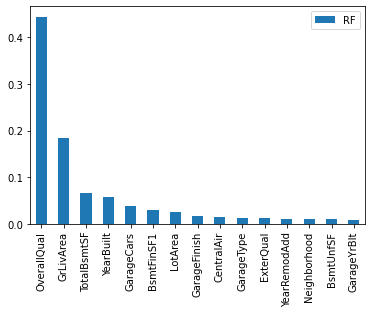

In [98]:
features = {}
for feature, importance in zip(scaled_df.drop('SalePrice',axis=1).columns, forest_model.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
importances[:15].plot.bar()

### Actual vs. Predicted Visualisation

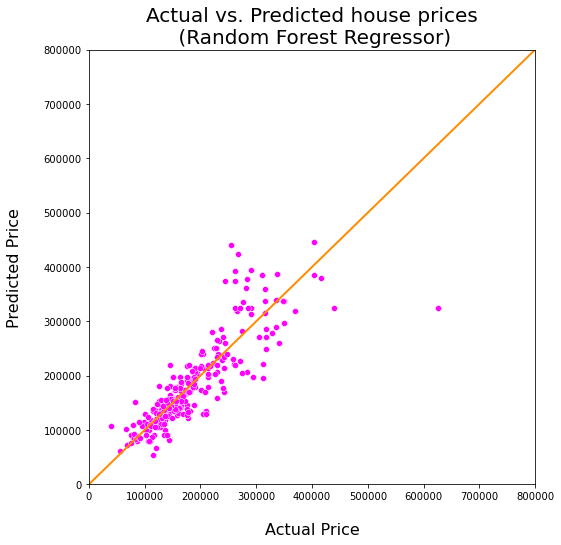

In [99]:
plt.figure(figsize=(8,8))

sns.scatterplot(x=np.exp(y_test),y=np.exp(y_pred), color='magenta')
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)

# Label metioned
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.title("Actual vs. Predicted house prices\n (Random Forest Regressor)", fontsize=20)
plt.show()

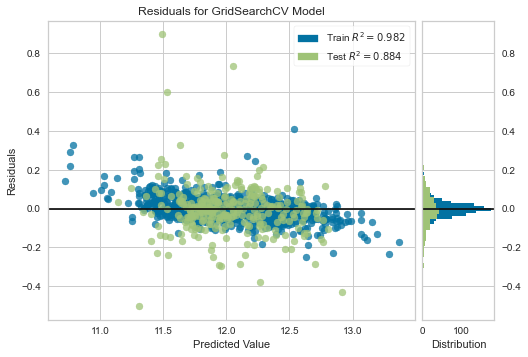

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [100]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


visualizer = ResidualsPlot(best_tree_model)
visualizer.fit(X = np.array(X_train),y = np.array(y_train))
visualizer.score(np.array(X_test), np.array(y_test))
visualizer.show()

## Submission

In [101]:
X_test = scaled_df2.drop('SalePrice',axis=1)

# Prediction of House Prices using Random Forest Regressor Model
y_tree_pred = best_tree_model.predict(X_test)

# Conversion of logarithmic predictions to logical data Sale Price
saleprice_pred = np.exp(y_tree_pred)

final_submission = pd.DataFrame({"Id": data_test_res['Id'].to_list(),"SalePrice": saleprice_pred})

In [102]:
final_submission.to_csv('submission.csv')